In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [5]:
yields = pd.read_csv('SoyabeanData_2.csv', sep=";", header=0)
yields.head()

,DISTRICTS,YEAR,YIELD,NDVI_JUN,NDVI_JUL,NDVI_AUG,NDVI_SEP,NDVI_OCT,NDVI_NOV,LAI_JUN,...,LST_SEP,LST_OCT,LST_NOV,RF_JUN,RF_JUL,RF_AUG,RF_SEP,RF_OCT,RF_NOV,YIELD_N1
0,Anuppur,2011,0.411731,0.358452,0.434819,0.524131,0.677431,0.593383,0.477271,0.567954,...,301.6111,302.9698,302.2573,7.769389,9.348433,14.452800,11.880410,0.821737,0.000000,0.402314
1,Ashoknagar,2011,1.178221,0.241188,0.362600,0.558422,0.523131,0.372065,0.335345,0.265376,...,305.5666,310.7607,306.9396,7.901649,13.023700,8.544753,7.204936,0.000000,0.008637,1.280708
2,Balaghat,2011,1.689655,0.456175,0.475566,0.523964,0.770839,0.696958,0.604985,0.837754,...,301.2737,301.9403,301.2473,6.776612,10.918880,19.803910,8.513394,0.416651,0.106264,1.741935
3,Barwani,2011,0.348127,0.182870,0.238343,0.455436,0.552991,0.440660,0.352182,0.209792,...,304.8209,309.9328,310.0919,3.338540,8.796704,12.733880,4.721150,0.401590,0.090122,0.286952
4,Betul,2011,1.268837,0.382777,0.331046,0.488085,0.670948,0.574909,0.476967,0.613691,...,302.7792,306.1960,305.7217,4.863829,11.915620,12.159300,8.255394,0.297665,0.130278,1.095832


In [84]:
yields.describe()  

,YEAR,YIELD,NDVI_JUN,NDVI_JUL,NDVI_AUG,NDVI_SEP,NDVI_OCT,NDVI_NOV,LAI_JUN,LAI_JUL,...,RF_JUN,RF_JUL,RF_AUG,RF_SEP,RF_OCT,RF_NOV,YIELD_N1,YIELDS,YIELDS_N1,DISTRICT
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,...,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2015.000000,0.962937,0.292348,0.354946,0.534898,0.584063,0.486246,0.444078,0.434664,0.531422,...,4.495816,13.271076,11.612374,6.446472,0.916025,0.113456,1.000728,0.500000,0.538647,22.500000
std,2.585113,0.397603,0.063082,0.099951,0.079340,0.079837,0.100630,0.073243,0.190966,0.223911,...,2.917224,4.099174,4.274359,3.942961,0.970080,0.131197,0.406468,0.500605,0.499107,13.291981
min,2011.000000,0.068565,0.108369,0.104135,0.270925,0.361784,0.297160,0.280770,0.191828,0.134593,...,0.299988,4.604396,2.782477,0.768566,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2013.000000,0.659873,0.246086,0.285473,0.482946,0.532201,0.401934,0.392555,0.286957,0.364036,...,2.641231,10.351730,7.982872,4.120147,0.248135,0.002829,0.690490,0.000000,0.000000,11.000000
50%,2015.000000,0.926265,0.286918,0.354143,0.542652,0.589512,0.476745,0.435697,0.387259,0.506229,...,3.918305,12.805555,11.017470,5.506100,0.587589,0.066092,0.991482,0.500000,1.000000,22.500000
75%,2017.000000,1.264069,0.327423,0.434860,0.598062,0.639045,0.558202,0.490466,0.544367,0.658378,...,5.627472,15.580348,14.667365,7.398980,1.239085,0.199284,1.297746,1.000000,1.000000,34.000000
max,2019.000000,2.488515,0.516840,0.593550,0.686390,0.790756,0.760128,0.685336,1.283500,1.248005,...,17.556680,27.128330,23.176880,24.664330,5.698166,0.784512,2.488515,1.000000,1.000000,45.000000


In [ ]:
sns.scatterplot(x='YIELD_N2', y='YIELD', data=yields)  

In [8]:
def test(yields):
    if yields <= 0.926265:
        return 0.0
    else:
        return 1.0


In [85]:
yields["YIELDS"] = yields['YIELD'].map(test)
yields["YIELDS_N1"] = yields['YIELD_N1'].map(test)
yields.head()                                         

,DISTRICTS,YEAR,YIELD,NDVI_JUN,NDVI_JUL,NDVI_AUG,NDVI_SEP,NDVI_OCT,NDVI_NOV,LAI_JUN,...,RF_JUN,RF_JUL,RF_AUG,RF_SEP,RF_OCT,RF_NOV,YIELD_N1,YIELDS,YIELDS_N1,DISTRICT
0,Anuppur,2011,0.411731,0.358452,0.434819,0.524131,0.677431,0.593383,0.477271,0.567954,...,7.769389,9.348433,14.452800,11.880410,0.821737,0.000000,0.402314,0.0,0.0,0
1,Ashoknagar,2011,1.178221,0.241188,0.362600,0.558422,0.523131,0.372065,0.335345,0.265376,...,7.901649,13.023700,8.544753,7.204936,0.000000,0.008637,1.280708,1.0,1.0,1
2,Balaghat,2011,1.689655,0.456175,0.475566,0.523964,0.770839,0.696958,0.604985,0.837754,...,6.776612,10.918880,19.803910,8.513394,0.416651,0.106264,1.741935,1.0,1.0,2
3,Barwani,2011,0.348127,0.182870,0.238343,0.455436,0.552991,0.440660,0.352182,0.209792,...,3.338540,8.796704,12.733880,4.721150,0.401590,0.090122,0.286952,0.0,0.0,3
4,Betul,2011,1.268837,0.382777,0.331046,0.488085,0.670948,0.574909,0.476967,0.613691,...,4.863829,11.915620,12.159300,8.255394,0.297665,0.130278,1.095832,1.0,1.0,4


In [87]:
yields["DISTRICT"] = yields["DISTRICTS"].astype('category').cat.codes
yields.head()

,DISTRICTS,YEAR,YIELD,NDVI_JUN,NDVI_JUL,NDVI_AUG,NDVI_SEP,NDVI_OCT,NDVI_NOV,LAI_JUN,...,RF_JUN,RF_JUL,RF_AUG,RF_SEP,RF_OCT,RF_NOV,YIELD_N1,YIELDS,YIELDS_N1,DISTRICT
0,Anuppur,2011,0.411731,0.358452,0.434819,0.524131,0.677431,0.593383,0.477271,0.567954,...,7.769389,9.348433,14.452800,11.880410,0.821737,0.000000,0.402314,0.0,0.0,0
1,Ashoknagar,2011,1.178221,0.241188,0.362600,0.558422,0.523131,0.372065,0.335345,0.265376,...,7.901649,13.023700,8.544753,7.204936,0.000000,0.008637,1.280708,1.0,1.0,1
2,Balaghat,2011,1.689655,0.456175,0.475566,0.523964,0.770839,0.696958,0.604985,0.837754,...,6.776612,10.918880,19.803910,8.513394,0.416651,0.106264,1.741935,1.0,1.0,2
3,Barwani,2011,0.348127,0.182870,0.238343,0.455436,0.552991,0.440660,0.352182,0.209792,...,3.338540,8.796704,12.733880,4.721150,0.401590,0.090122,0.286952,0.0,0.0,3
4,Betul,2011,1.268837,0.382777,0.331046,0.488085,0.670948,0.574909,0.476967,0.613691,...,4.863829,11.915620,12.159300,8.255394,0.297665,0.130278,1.095832,1.0,1.0,4


In [117]:
y = yields[["YIELDS"]]     
X = yields.drop(['DISTRICTS',"YIELDS", "YEAR", "YIELD", 'ET_JUL', "ET_OCT", 'ET_SEP', 'ET_NOV', "ET_AUG"], axis=1)
X.head()

,NDVI_JUN,NDVI_JUL,NDVI_AUG,NDVI_SEP,NDVI_OCT,NDVI_NOV,LAI_JUN,LAI_JUL,LAI_AUG,LAI_SEP,...,LST_NOV,RF_JUN,RF_JUL,RF_AUG,RF_SEP,RF_OCT,RF_NOV,YIELD_N1,YIELDS_N1,DISTRICT
0,0.358452,0.434819,0.524131,0.677431,0.593383,0.477271,0.567954,0.985886,0.753611,1.785671,...,302.2573,7.769389,9.348433,14.452800,11.880410,0.821737,0.000000,0.402314,0.0,0
1,0.241188,0.362600,0.558422,0.523131,0.372065,0.335345,0.265376,0.521900,1.293023,1.246159,...,306.9396,7.901649,13.023700,8.544753,7.204936,0.000000,0.008637,1.280708,1.0,1
2,0.456175,0.475566,0.523964,0.770839,0.696958,0.604985,0.837754,1.239571,0.677925,2.437563,...,301.2473,6.776612,10.918880,19.803910,8.513394,0.416651,0.106264,1.741935,1.0,2
3,0.182870,0.238343,0.455436,0.552991,0.440660,0.352182,0.209792,0.262409,0.640551,1.442936,...,310.0919,3.338540,8.796704,12.733880,4.721150,0.401590,0.090122,0.286952,0.0,3
4,0.382777,0.331046,0.488085,0.670948,0.574909,0.476967,0.613691,0.699881,1.099906,1.831250,...,305.7217,4.863829,11.915620,12.159300,8.255394,0.297665,0.130278,1.095832,1.0,4


In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=10) 
print('Test set', X_test.shape)
print('Train set', X_train.shape)

Test set (42, 28)
Train set (372, 28)


In [119]:
model = KNeighborsClassifier(n_neighbors=4)

In [120]:
model.fit(X_train, y_train.values.ravel())    
print(model.score(X_train, y_train.values.ravel()))

0.7795698924731183


In [121]:
model.score(X_test, y_test)  

0.6428571428571429

In [122]:
cross_val_score(KNeighborsClassifier(3), X_train, y_train.values.ravel(), cv=10, scoring='accuracy').mean()

0.6612375533428165

array([0.66425225, 0.63989189, 0.68021622, 0.63715315, 0.65055856,
       0.63967568, 0.6181982 , 0.61286486, 0.63163964, 0.60479279,
       0.61837838, 0.6076036 , 0.61293694, 0.61293694, 0.61009009,
       0.60756757, 0.61553153, 0.6101982 , 0.61016216, 0.62353153,
       0.6316036 , 0.62882883, 0.6289009 , 0.63437838, 0.6181982 ,
       0.63978378, 0.62097297, 0.63181982, 0.62918919, 0.63452252,
       0.63455856, 0.62911712, 0.63455856, 0.63448649, 0.63167568,
       0.63978378, 0.63430631, 0.62900901, 0.62634234, 0.6129009 ,
       0.62641441, 0.62093694, 0.62623423, 0.6316036 , 0.62086486,
       0.63697297, 0.6261982 , 0.6316036 , 0.60742342, 0.61286486,
       0.60198198, 0.60753153, 0.6129009 , 0.60753153, 0.61282883,
       0.6101982 , 0.61009009, 0.60742342, 0.60468468, 0.60475676,
       0.61012613, 0.62082883, 0.61005405, 0.60738739, 0.61012613,
       0.60479279, 0.61016216, 0.60745946, 0.59672072, 0.60472072,
       0.59935135, 0.59672072, 0.60753153, 0.59945946, 0.59949

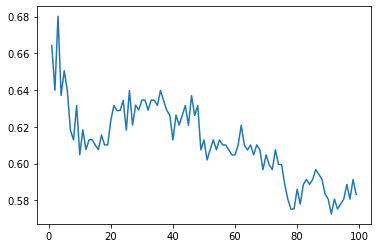

In [123]:
k = np.arange(1, 100)

train_score, val_score = validation_curve(model, X_train, y_train.values.ravel(), param_name="n_neighbors", param_range=k, cv=5)



plt.plot(k,val_score.mean(axis=1))
#plt.plot(k,train_score.mean(axis=1))

val_score.mean(axis=1)

In [124]:
param_grid = {'n_neighbors': np.arange(1,20), 'metric':['euclidean', 'manhattan']}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10)

grid.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [125]:
grid.best_score_

0.69900426742532

In [126]:
grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 3}

In [127]:
model_best = grid.best_estimator_

In [128]:
model_best.score(X_test, y_test)

0.7142857142857143

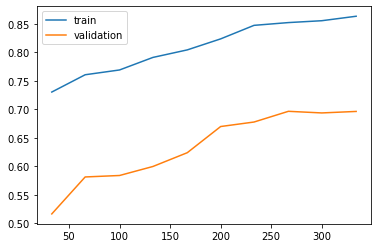

In [129]:
N, train_score, val_score = learning_curve(model_best, X_train, y_train.values.ravel(), train_sizes = np.linspace(0.1, 1.0, 10), cv=10)  
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.legend()